# A Climatological Analysis of the Surface Drainage of the Amery Ice Shelf, East Antarctica

## Between summer air temperature amd summer sunniness, which is a larger control on the size of surface meltwater lakes? 

In [1]:
from dask.diagnostics import ProgressBar
import numpy as np
import datetime
from datetime import date
import xarray as xr
import dask.array as da
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

Text(0.5,0.5,'Melt Lakes on the Amery Ice Shelf, East Antarctica, Jan 13, 2017')

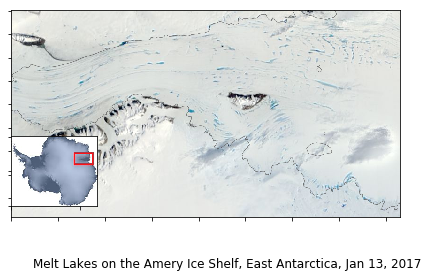

In [2]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.9, 2])
ax2 = fig.add_axes([0, 0, 0.2, 1.6])
lakepicture = plt.imread('nasa-worldview_2017_01_13_1493062018.tif')
antarcticamap = plt.imread('simple_antarctica_wamery.jpg')
ax1.imshow(lakepicture)
ax1.set_xticklabels(labels=[],fontdict={'color':'w'})
ax1.set_yticklabels(labels=[],fontdict={'color':'w'})
ax2.set_xticklabels(labels=[],fontdict={'color':'w'})
ax2.set_yticklabels(labels=[],fontdict={'color':'w'})
ax2.imshow(antarcticamap)
fig.suptitle('Melt Lakes on the Amery Ice Shelf, East Antarctica, Jan 13, 2017', x=0.5,y=0.5)

## PATMOSx Cloud Data
### Cloud fraction data from PATMOSx satellite

In [3]:
ds = xr.open_dataset('http://www.ncei.noaa.gov/thredds/dodsC/avhrr-patmos-x-cloudprops-noaa-asc-fc/PATMOS-X_Cloud_Properties:_Aggregation,_NOAA_ascending_best.ncd')

In [4]:
cloud_fract = ds.cloud_fraction.sel(latitude=slice(-75,-65),longitude=slice(50,85),time=slice('1998-01-01','2017-06-30'))
coastlines = ds.land_class.sel(time='1998-01-01',latitude=slice(-75,-65),longitude=slice(50,85)).where('land_class'==2)

In [122]:
summer_cloudiness_1999 = cloud_fract.sel(time=slice(datetime.date(1998,12,31),datetime.date(1999,3,1))).mean(dim='time')
summer_cloudiness_2000 = cloud_fract.sel(time=slice(datetime.date(1999,12,31),datetime.date(2000,3,1))).mean(dim='time')
summer_cloudiness_2001 = cloud_fract.sel(time=slice(datetime.date(2000,12,31),datetime.date(2001,3,1))).mean(dim='time')
summer_cloudiness_2002 = cloud_fract.sel(time=slice(datetime.date(2001,12,31),datetime.date(2002,3,1))).mean(dim='time')
summer_cloudiness_2003 = cloud_fract.sel(time=slice(datetime.date(2002,12,31),datetime.date(2003,3,1))).mean(dim='time')
summer_cloudiness_2004 = cloud_fract.sel(time=slice(datetime.date(2003,12,31),datetime.date(2004,3,1))).mean(dim='time')
summer_cloudiness_2005 = cloud_fract.sel(time=slice(datetime.date(2004,12,31),datetime.date(2005,3,1))).mean(dim='time')
summer_cloudiness_2006 = cloud_fract.sel(time=slice(datetime.date(2005,12,31),datetime.date(2006,3,1))).mean(dim='time')
summer_cloudiness_2007 = cloud_fract.sel(time=slice(datetime.date(2006,12,31),datetime.date(2007,3,1))).mean(dim='time')
summer_cloudiness_2008 = cloud_fract.sel(time=slice(datetime.date(2007,12,31),datetime.date(2008,3,1))).mean(dim='time')
summer_cloudiness_2009 = cloud_fract.sel(time=slice(datetime.date(2008,12,31),datetime.date(2009,3,1))).mean(dim='time')
summer_cloudiness_2010 = cloud_fract.sel(time=slice(datetime.date(2009,12,31),datetime.date(2010,3,1))).mean(dim='time')
summer_cloudiness_2011 = cloud_fract.sel(time=slice(datetime.date(2010,12,31),datetime.date(2011,3,1))).mean(dim='time')
summer_cloudiness_2012 = cloud_fract.sel(time=slice(datetime.date(2011,12,31),datetime.date(2012,3,1))).mean(dim='time')
summer_cloudiness_2013 = cloud_fract.sel(time=slice(datetime.date(2012,12,31),datetime.date(2013,3,1))).mean(dim='time')
summer_cloudiness_2014 = cloud_fract.sel(time=slice(datetime.date(2013,12,31),datetime.date(2014,3,1))).mean(dim='time')
summer_cloudiness_2015 = cloud_fract.sel(time=slice(datetime.date(2014,12,31),datetime.date(2015,3,1))).mean(dim='time')
summer_cloudiness_2016 = cloud_fract.sel(time=slice(datetime.date(2015,12,31),datetime.date(2016,3,1))).mean(dim='time')
summer_cloudiness_2017 = cloud_fract.sel(time=slice(datetime.date(2016,12,31),datetime.date(2017,3,1))).mean(dim='time')


In [123]:
summer_cloudiness = xr.concat([summer_cloudiness_1999,summer_cloudiness_2000,summer_cloudiness_2001,summer_cloudiness_2003,
                              summer_cloudiness_2004,summer_cloudiness_2005,summer_cloudiness_2006,summer_cloudiness_2007,
                             summer_cloudiness_2008,summer_cloudiness_2009,summer_cloudiness_2010,summer_cloudiness_2011,
                             summer_cloudiness_2012,summer_cloudiness_2013,summer_cloudiness_2014,summer_cloudiness_2015,
                             summer_cloudiness_2016,summer_cloudiness_2017],dim='time')

In [130]:
summer_cloudiness.to_netcdf('w')

In [165]:
summer_cloudiness = xr.open_dataset('summer_cloudiness')
summer_cloudiness

<xarray.Dataset>
Dimensions:         (latitude: 100, longitude: 350, time: 18)
Coordinates:
  * latitude        (latitude) float32 -74.94827 -74.84939 -74.747765 ...
  * longitude       (longitude) float32 50.049744 50.148624 50.247505 ...
Dimensions without coordinates: time
Data variables:
    cloud_fraction  (time, latitude, longitude) float32 ...

<xarray.DataArray 'time' (time: 18)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])
Dimensions without coordinates: time

(18, 18)

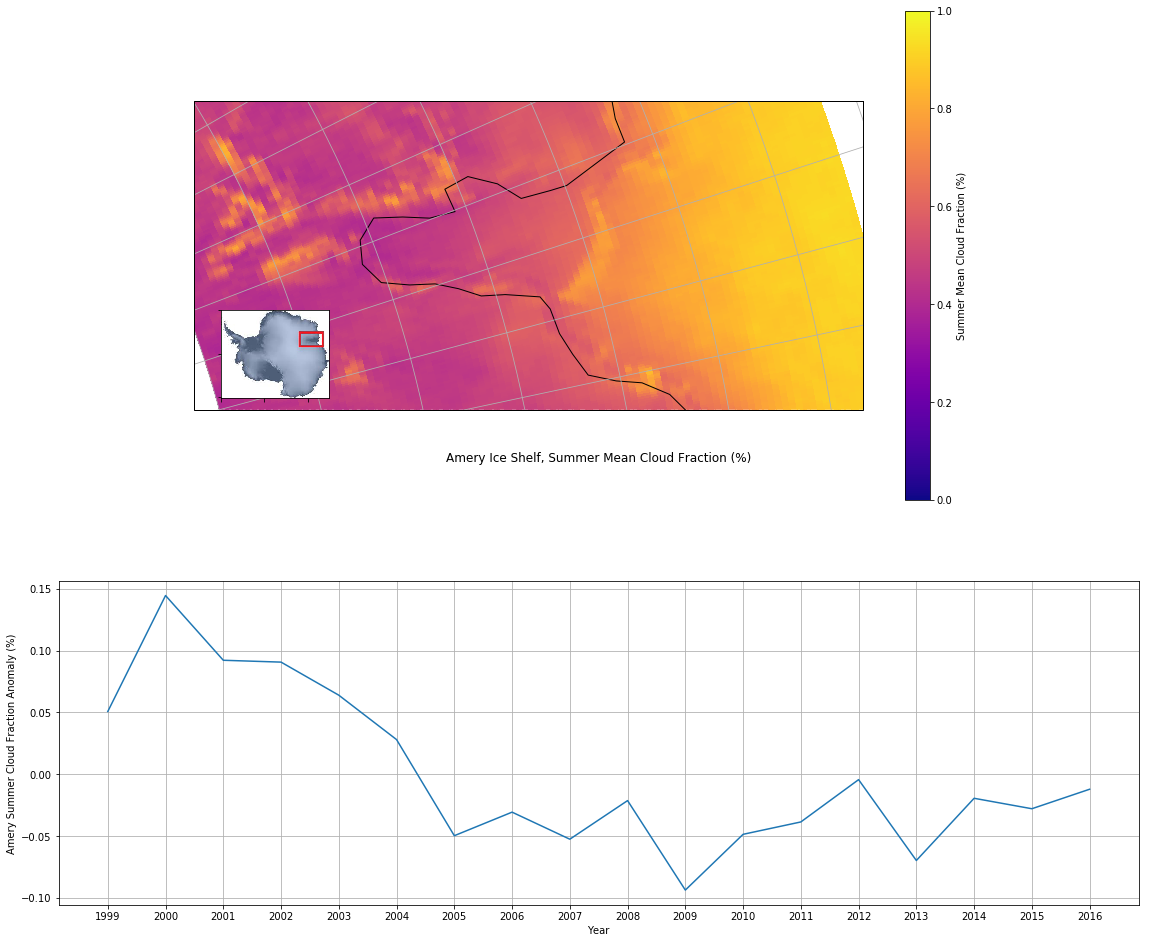

In [233]:
%matplotlib inline
figure = plt.figure(figsize=(15, 9))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([70, 75, -75, -65], ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
summerplot = summer_cloudiness.cloud_fraction.mean(dim='time').plot(ax=ax,vmin=0,vmax=1,transform=ccrs.PlateCarree(),
                                                                    cbar_kwargs={'label':'Summer Mean Cloud Fraction (%)'},
                                                                   cmap='plasma')
ax2 = figure.add_axes([0.15, 0, 0.1, 0.7])
ax2.imshow(antarcticamap)
ax2.set_xticklabels(labels=[],fontdict={'color':'w'})
ax2.set_yticklabels(labels=[],fontdict={'color':'w'})
figure.suptitle('Amery Ice Shelf, Summer Mean Cloud Fraction (%)',y=0.2);


years = np.arange(1999,2017)
ax3 = figure.add_axes([0,-.5,1,0.5])
anomalyplot = (summer_cloudiness.cloud_fraction.mean(dim=['latitude','longitude'])-
              summer_cloudiness.cloud_fraction.mean(dim=['latitude','longitude']).mean('time'))
#ax.set_xticklabels(summer_cloudiness.time.values+1999)
anomalycloudiness = pd.Series(anomalyplot.data.tolist(), index=years)
anomalycloudiness.plot(grid=True,xticks=years, ax=ax3)
ax3.set_ylabel('Amery Summer Cloud Fraction Anomaly (%)')
ax3.set_xlabel('Year');


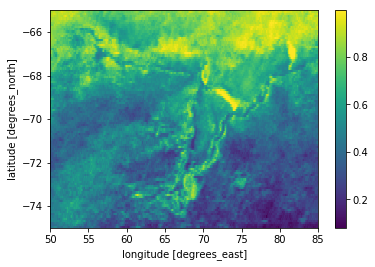

In [7]:

summer_cloudiness.plot()

In [208]:
percent_cloudy_den = cloud_fract_ss.sel(time='1999')

array([], dtype=int64)

In [212]:
percent_cloudy_num = cloud_fract_ss.where(cloud_fract_ss>0.5).count(dim='time')

RuntimeError: NetCDF: Access failure

In [ ]:
percent_cloudy.rolling(time=30,center=True).mean().plot()

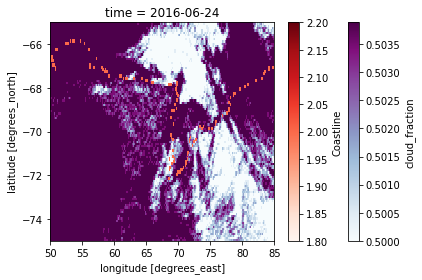

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
cloud_frac.sel(latitude=slice(-75,-65),longitude=slice(50,85)).plot(ax=ax,cmap='BuPu')
land_class.sel(latitude=slice(-75,-65),longitude=slice(50,85)).where(land_class==2).plot(ax=ax,cmap='Reds',cbar_kwargs={'label':'Coastline'})
fig.tight_layout()

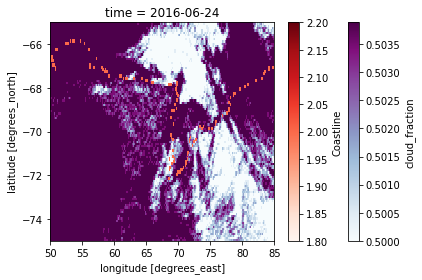

In [5]:
fig, ax = plt.subplots()
cloud_frac.sel(latitude=slice(-75,-65),longitude=slice(50,85)).plot(ax=ax,cmap='BuPu')
land_class.sel(latitude=slice(-75,-65),longitude=slice(50,85)).where(land_class==2).plot(ax=ax,cmap='Reds',cbar_kwargs={'label':'Coastline'})
fig.tight_layout()

In [6]:
surftemp = patmosx_062416.surface_temperature_retrieved - 273.15

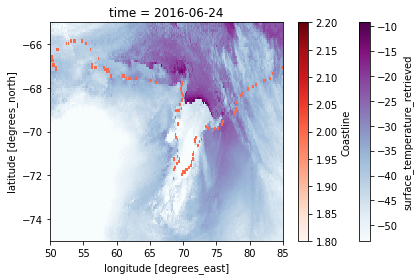

In [7]:
fig, ax = plt.subplots()
surftemp.sel(latitude=slice(-75,-65),longitude=slice(50,85)).plot(ax=ax,cmap='BuPu')
land_class.sel(latitude=slice(-75,-65),longitude=slice(50,85)).where(land_class==2).plot(ax=ax,cmap='Reds',cbar_kwargs={'label':'Coastline'})
fig.tight_layout()

## AWS Temperature Data from Amery G3 AWS

In [1]:
! wget http://aws.acecrc.org.au/data/AmeryG3_antarctic_aws_1999_2017.nc

--2018-11-12 19:51:01--  http://aws.acecrc.org.au/data/AmeryG3_antarctic_aws_1999_2017.nc
Resolving aws.acecrc.org.au (aws.acecrc.org.au)... 144.6.226.118
Connecting to aws.acecrc.org.au (aws.acecrc.org.au)|144.6.226.118|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9260468 (8.8M) [application/x-netcdf]
Saving to: ‘AmeryG3_antarctic_aws_1999_2017.nc.1’

AmeryG3_antarctic_a 100%[===================>]   8.83M  4.30MB/s    in 2.1s    

2018-11-12 19:51:04 (4.30 MB/s) - ‘AmeryG3_antarctic_aws_1999_2017.nc.1’ saved [9260468/9260468]



In [22]:
import xarray as xr
import pandas as pd
AmeryAWS = xr.open_dataset('AmeryG3_antarctic_aws_1999_2017.nc')
AmeryAWS.Time
AmeryAWS = AmeryAWS.swap_dims({'time':'Time'})


In [25]:
AiT4 = AmeryAWS.AiT4
AiT1 = AmeryAWS.AiT1
WVM = AmeryAWS.WVM

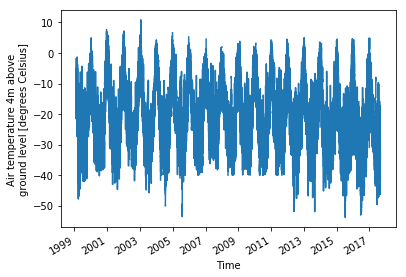

In [24]:
%matplotlib inline
AiT4.plot()

In [13]:
import numpy as np

In [27]:
temperature_compare = xr.merge([AiT1,AiT4, WVM],'no_conflicts')

In [31]:
summers = temperature_compare.where(temperature_compare.Time.dt.season=='DJF')

In [62]:
import datetime

In [82]:
#Because the austral summer straddles the year division, the temperature data needs to be re-indexed so that 
#the austral summer is contained within the same year.
summer_reindexed = summers.shift(Time=-90)

In [134]:
summer_AiT4_anom = (summer_reindexed.AiT4.resample('1Y', dim='Time') 
                    - summer_reindexed.AiT4.resample('1Y', dim='Time').mean(dim='Time'))
summer_AiT4_anom = pd.DataFrame(data={'summer_anom':summer_AiT4_anom.values}, index = summer_AiT4_anom.Time.dt.year)
summer_AiT4_anom.rename_axis('years')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and how="mean", instead consider using .resample(Time="1Y").mean('Time') 
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and how="mean", instead consider using .resample(Time="1Y").mean('Time') 
  


,summer_anom
years,
1999,-2.061375
2000,-0.546466
2001,1.384095
2002,0.601681
2003,2.485256
2004,3.030502
2005,2.427236
2006,0.238257
2007,0.018545


## Amery Lakes

In [1]:
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt

Text(0,0.5,'Surface Area (m$^2$)')

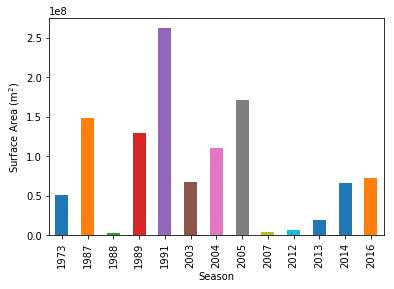

In [117]:
biglakegeometry =pd.DataFrame(data={'years':[1973,1987,1988,1989,1991,2003,2004,2005,2007,2012,2013,2014,2016],
                              'BLarea': [50485500,148802000,3467700,129943000,262175616,67428000,110199000,171816000
                                         ,3839400,6787554,19089900,66546000,71992800]},index=years)
ax = plt.subplot()
biglakegeometry.BLarea.plot.bar(ax=ax)
ax.set_xlabel('Season')
ax.set_ylabel('Surface Area (m$^2$)')

In [139]:
BLarea = pd.DataFrame(data= biglakegeometry.BLarea, index=biglakegeometry.years)
BLarea

,BLarea
years,
1973,50485500
1987,148802000
1988,3467700
1989,129943000
1991,262175616
2003,67428000
2004,110199000
2005,171816000
2007,3839400


In [145]:
lakesize_temperature

,key_0,BLarea,summer_anom
0,2003,67428000,2.485256
1,2004,110199000,3.030502
2,2005,171816000,2.427236
3,2007,3839400,0.018545
4,2012,6787554,-0.784691
5,2013,19089900,-0.089135
6,2014,66546000,-0.884978
7,2016,71992800,-2.907577


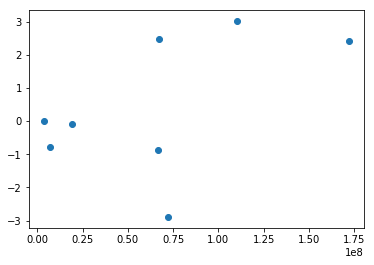

In [146]:
plt.scatter(x=lakesize_temperature.BLarea, y=lakesize_temperature.summer_anom)

## Amery Lake Mask Shapefiles

In [153]:
import salem

ModuleNotFoundError: No module named 'salem'

## Comparison between temperature and lakes areas

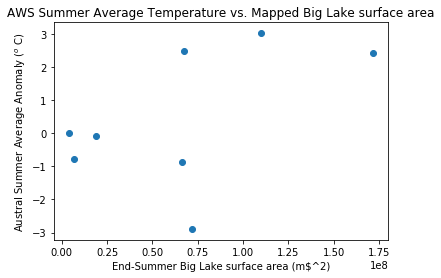

In [152]:
lakesize_temperature= pd.merge(BLarea,summer_AiT4_anom,left_on=BLarea.index,right_on=summer_AiT4_anom.index)
fig = plt.subplot()
plt.scatter(x=lakesize_temperature.BLarea, y=lakesize_temperature.summer_anom)
fig.set_xlabel('End-Summer Big Lake surface area (m$^2)')
fig.set_ylabel('Austral Summer Average Anomaly ($^o$ C)')
fig.set_title('AWS Summer Average Temperature vs. Mapped Big Lake surface area');